In [347]:

import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
# Load data into data frame
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

df = pd.read_csv(root / "data" / "raw" / "ios_turns.csv", header=0)
df.head()

,init_time,eventAction,payloadCreation,eventStart,eventEnd,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventStartLatitude,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,validity_mean
0,1.713042e+12,1.0,1.0,479553.47,484875.20,4.0,8.553064,5.321719,0.014196,41.966473,...,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279,1.0
1,1.713042e+12,1.0,1.0,459179.94,464064.80,4.0,9.360758,4.884875,0.012575,41.966442,...,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140,1.0
2,1.713042e+12,1.0,1.0,448020.16,456677.90,5.0,10.681455,8.657750,0.021795,41.966310,...,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355,1.0
3,1.713042e+12,1.0,1.0,427011.25,434835.00,5.0,10.399240,7.823751,0.016130,41.966670,...,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf,1.0
4,1.713042e+12,1.0,1.0,395398.60,402547.22,4.0,8.345368,7.148625,0.017785,41.968548,...,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477,1.0


In [349]:
df.columns.to_list()

['init_time',
 'eventAction',
 'payloadCreation',
 'eventStart',
 'eventEnd',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventStartLatitude',
 'eventStartLongitude',
 'eventEndLatitude',
 'eventEndLongitude',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'eventSpeedChange',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'validity_mean']

In [350]:
# Dropping irrelevent features (explanation in Notion)
df = df.drop(
    ['eventAction', 'eventSpeedChange', 'payloadCreation',
     'validity_mean', 'init_time', 'eventStart', 'eventEnd', 'eventStartLatitude',
     'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude'],
    axis=1
)

df.columns.to_list()

['eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius']

In [351]:
df.describe()

/Users/shazi/VS Code/Arity - BTT Project 1/ARITY-BTT-PROJECT-1/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius
count,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,...,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,61094.000000,60859.000000,61094.000000,61094.000000,6.109100e+04
mean,4.512440,15.616635,4.954434,0.022619,1.131011,6.818543,15.287629,16.974019,1.178195,1.801076,...,3.290195,1.474784,2.664718,3.561963,16.155392,12.060006,72.868898,59.401857,154.769521,NaN
std,0.499849,15.057503,3.088469,0.025124,0.926085,8.378248,19.745252,14.044510,0.995345,1.207450,...,2.285000,1.845171,7.134243,7.284046,11.350997,6.093657,39.745732,40.479495,3347.202429,NaN
min,4.000000,5.001024,0.914496,0.000000,0.000000,2.000000,-2.236940,-2.236940,0.000000,0.005836,...,0.014992,-0.089241,-0.000000,0.000000,0.000000,0.000121,0.000000,0.000137,0.286599,-inf
25%,4.000000,9.713930,2.958125,0.010235,0.000000,4.740406,8.131329,11.164708,0.427068,0.997171,...,2.279898,0.345133,1.489937,2.119720,9.257651,7.919867,45.924542,26.880174,13.241270,1.676608e+01
50%,5.000000,13.658226,4.655649,0.016879,2.000000,4.756594,13.314892,15.510978,0.993460,1.590590,...,2.977058,1.212294,2.383681,3.218249,13.744654,12.079066,76.711080,59.295506,24.250653,5.296442e+01
75%,5.000000,18.821297,6.152793,0.027195,2.000000,7.059539,19.834566,20.721055,1.699174,2.334050,...,3.764590,2.133511,3.515874,4.555012,18.918240,16.067764,90.302572,86.108830,49.206554,3.753227e+02
max,5.000000,1307.922100,24.980251,1.908790,2.000000,477.784180,2618.081300,1221.429100,15.893914,25.367445,...,63.657814,275.073360,1625.099200,1625.099200,186.620740,158.511840,726.318100,455.013920,348236.470000,inf


In [352]:
df['eventStartSpeed'].describe()

count    61094.000000
mean        15.287629
std         19.745252
min         -2.236940
25%          8.131329
50%         13.314892
75%         19.834566
max       2618.081300
Name: eventStartSpeed, dtype: float64

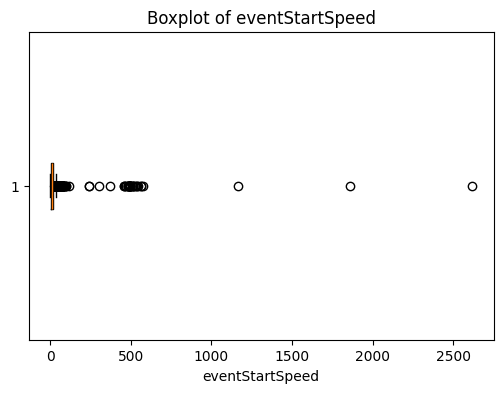

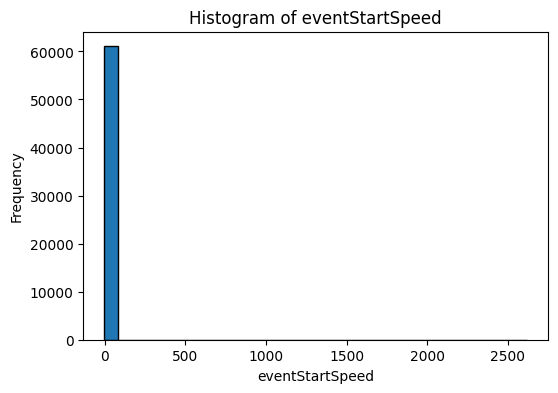

In [353]:
plt.figure(figsize=(6,4))
plt.boxplot(df['eventStartSpeed'], vert=False)
plt.title(f'Boxplot of {'eventStartSpeed'}')
plt.xlabel('eventStartSpeed')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventStartSpeed'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventStartSpeed'}')
plt.xlabel('eventStartSpeed')
plt.ylabel('Frequency')
plt.show()

count    61080.000000
mean        15.291645
std         19.745732
min          0.000000
25%          8.133535
50%         13.317163
75%         19.840765
max       2618.081300
Name: eventStartSpeed, dtype: float64


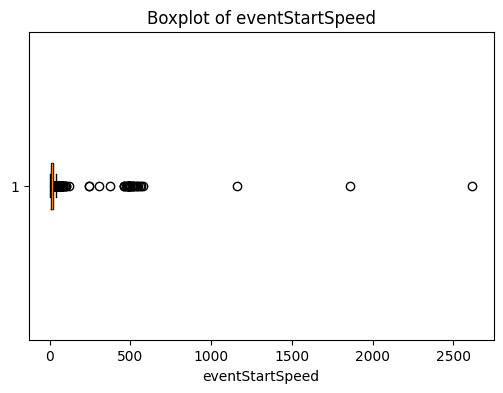

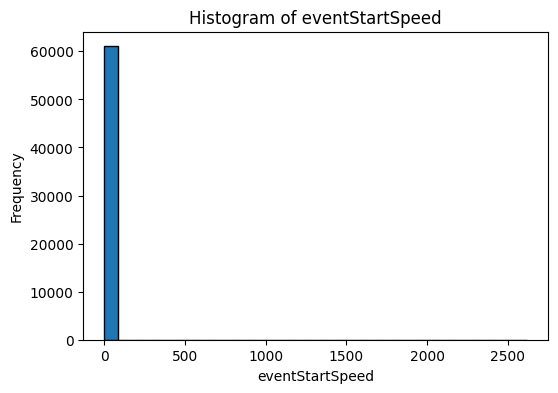

In [354]:
df = df[df['eventStartSpeed'] >= 0]
print(df['eventStartSpeed'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventStartSpeed'], vert=False)
plt.title(f'Boxplot of {'eventStartSpeed'}')
plt.xlabel('eventStartSpeed')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventStartSpeed'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventStartSpeed'}')
plt.xlabel('eventStartSpeed')
plt.ylabel('Frequency')
plt.show()

count    61028.000000
mean        16.733647
std          8.143503
min          0.000000
25%         11.166413
50%         15.508650
75%         20.714064
max        116.969590
Name: eventEndSpeed, dtype: float64


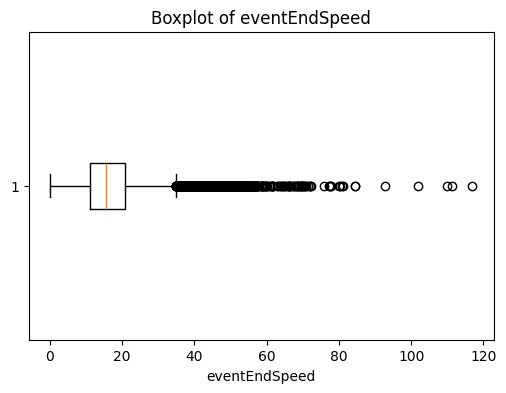

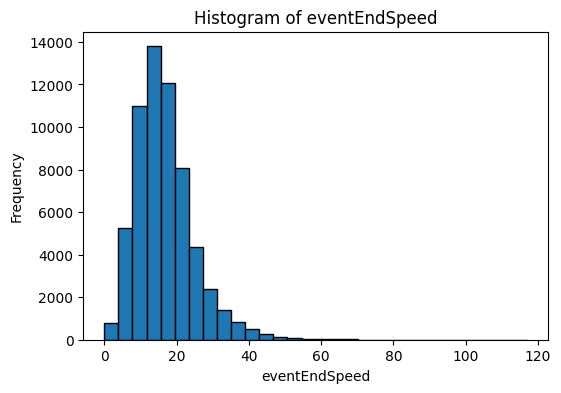

In [355]:
df = df[df['eventEndSpeed'] >= 0]
df = df[df['eventEndSpeed'] <= 120]

print(df['eventEndSpeed'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventEndSpeed'], vert=False)
plt.title(f'Boxplot of {'eventEndSpeed'}')
plt.xlabel('eventEndSpeed')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventEndSpeed'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventEndSpeed'}')
plt.xlabel('eventEndSpeed')
plt.ylabel('Frequency')
plt.show()

In [356]:
df[df["eventEndSpeed"] >= 80]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius
10011,5.0,55.536827,5.951250,0.169498,0.0,29.244131,39.795166,80.843010,1.008712,1.869731,...,2.867263,3.200641,4.213108,4.257080,8.683822,0.528018,58.359170,3.163455,1232.589500,152.595100
10016,5.0,116.969590,0.958586,0.148214,0.0,151.445040,116.969590,116.969590,3.488818,3.918879,...,17.877651,14.118838,14.118838,14.118838,26.405891,7.088834,30.941975,7.078392,278.824650,325.257780
38839,4.0,56.119236,2.968000,0.416358,0.0,65.398100,35.030480,111.399610,0.252590,1.920758,...,4.039463,6.346473,7.680057,7.680057,19.426014,9.208582,71.353714,27.700413,20.109747,58.423714
42082,4.0,83.934400,1.447938,0.023603,2.0,2.042409,83.322900,84.545890,6.927329,7.566165,...,8.490957,1.271527,1.271527,1.271527,1.668254,29.294144,3.876131,43.594315,2346.233200,1178.701800
49311,4.0,92.908905,4.829000,0.103289,2.0,4.660463,93.422874,92.795654,1.025499,1.992407,...,2.648549,2.782334,3.127677,3.261886,3.121254,7.070049,16.105791,34.423428,110.328210,618.463440
49312,5.0,101.684990,3.632500,0.085054,1.0,4.722541,101.549355,101.888290,0.386638,0.623911,...,1.901799,3.845366,3.932395,3.932395,3.917534,9.640648,19.179136,35.404484,50.867157,537.320700
50698,5.0,73.813710,3.728625,0.099553,0.0,60.504253,65.091720,84.479140,0.609222,1.011471,...,2.287202,7.078252,12.439518,12.439518,8.156245,0.096893,51.201633,0.365161,353.283500,238.282350
51129,4.0,79.728650,2.498500,0.044555,2.0,4.699545,79.473785,80.083910,0.052296,0.416082,...,1.392530,2.446852,4.235865,4.235865,4.230453,11.805872,14.515944,29.972730,24.986550,515.831700
52169,4.0,60.075260,3.930000,0.500143,0.0,372.673200,37.088467,109.833755,4.830028,4.886740,...,5.003054,1.794109,12.653198,18.256426,13.060554,0.168527,56.601820,0.669069,32528.098000,180.134800
53877,5.0,80.439610,2.156500,0.022784,1.0,10.000000,80.554695,80.324540,0.187371,1.303809,...,3.338670,0.089018,0.089018,0.089018,0.139116,16.283860,0.300004,35.766440,14.877054,inf


In [357]:
#we noticed some absurdities in the data between start and end speeds, so the new approach
#is to calulate the speed difference within a time frame and drop strange nodes
df["speed_gap"] = (df["eventEndSpeed"] - df["eventStartSpeed"]).abs()
df = df[~((df["speed_gap"] > 10) & (df["eventDurationSeconds"] < 2) | (df["speed_gap"] < -10)& (df["eventDurationSeconds"] < 2))]

In [358]:
df[df["eventEndSpeed"] >= 80]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap
10011,5.0,55.536827,5.951250,0.169498,0.0,29.244131,39.795166,80.843010,1.008712,1.869731,...,3.200641,4.213108,4.257080,8.683822,0.528018,58.359170,3.163455,1232.589500,152.595100,41.047844
10016,5.0,116.969590,0.958586,0.148214,0.0,151.445040,116.969590,116.969590,3.488818,3.918879,...,14.118838,14.118838,14.118838,26.405891,7.088834,30.941975,7.078392,278.824650,325.257780,0.000000
38839,4.0,56.119236,2.968000,0.416358,0.0,65.398100,35.030480,111.399610,0.252590,1.920758,...,6.346473,7.680057,7.680057,19.426014,9.208582,71.353714,27.700413,20.109747,58.423714,76.369130
42082,4.0,83.934400,1.447938,0.023603,2.0,2.042409,83.322900,84.545890,6.927329,7.566165,...,1.271527,1.271527,1.271527,1.668254,29.294144,3.876131,43.594315,2346.233200,1178.701800,1.222990
49311,4.0,92.908905,4.829000,0.103289,2.0,4.660463,93.422874,92.795654,1.025499,1.992407,...,2.782334,3.127677,3.261886,3.121254,7.070049,16.105791,34.423428,110.328210,618.463440,0.627220
49312,5.0,101.684990,3.632500,0.085054,1.0,4.722541,101.549355,101.888290,0.386638,0.623911,...,3.845366,3.932395,3.932395,3.917534,9.640648,19.179136,35.404484,50.867157,537.320700,0.338935
50698,5.0,73.813710,3.728625,0.099553,0.0,60.504253,65.091720,84.479140,0.609222,1.011471,...,7.078252,12.439518,12.439518,8.156245,0.096893,51.201633,0.365161,353.283500,238.282350,19.387420
51129,4.0,79.728650,2.498500,0.044555,2.0,4.699545,79.473785,80.083910,0.052296,0.416082,...,2.446852,4.235865,4.235865,4.230453,11.805872,14.515944,29.972730,24.986550,515.831700,0.610125
52169,4.0,60.075260,3.930000,0.500143,0.0,372.673200,37.088467,109.833755,4.830028,4.886740,...,1.794109,12.653198,18.256426,13.060554,0.168527,56.601820,0.669069,32528.098000,180.134800,72.745288
53877,5.0,80.439610,2.156500,0.022784,1.0,10.000000,80.554695,80.324540,0.187371,1.303809,...,0.089018,0.089018,0.089018,0.139116,16.283860,0.300004,35.766440,14.877054,inf,0.230155


In [359]:
df['eventGPSSignalStrength'].describe()

count    60862.000000
mean         6.755278
std          7.946457
min          2.000000
25%          4.740391
50%          4.756317
75%          7.007597
max        477.784180
Name: eventGPSSignalStrength, dtype: float64

count    60862.000000
mean         6.755278
std          7.946457
min          2.000000
25%          4.740391
50%          4.756317
75%          7.007597
max        477.784180
Name: eventGPSSignalStrength, dtype: float64


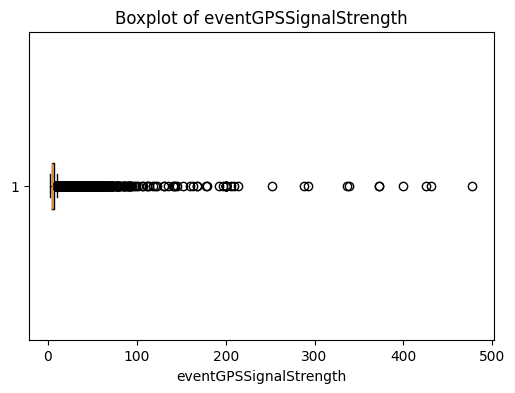

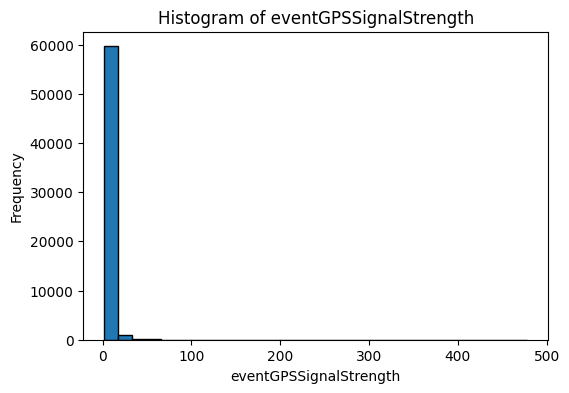

In [360]:
df = df[df['eventGPSSignalStrength'] >= 0]
print(df['eventGPSSignalStrength'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventGPSSignalStrength'], vert=False)
plt.title(f'Boxplot of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventGPSSignalStrength'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.ylabel('Frequency')
plt.show()

count    60693.000000
mean         6.480086
std          4.194568
min          2.000000
25%          4.740355
50%          4.755803
75%          6.930461
max         50.000000
Name: eventGPSSignalStrength, dtype: float64


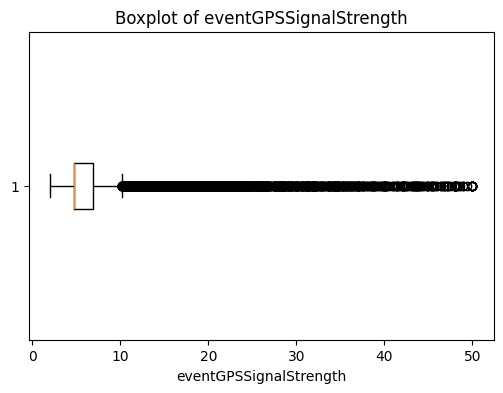

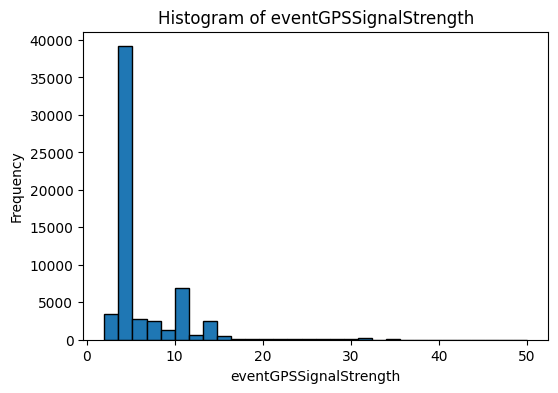

In [361]:
df = df[df['eventGPSSignalStrength'] <= 50]
print(df['eventGPSSignalStrength'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventGPSSignalStrength'], vert=False)
plt.title(f'Boxplot of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventGPSSignalStrength'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.ylabel('Frequency')
plt.show()

count    55222.000000
mean         5.492511
std          1.948901
min          2.000000
25%          4.739249
50%          4.747263
75%          5.002807
max         10.000000
Name: eventGPSSignalStrength, dtype: float64


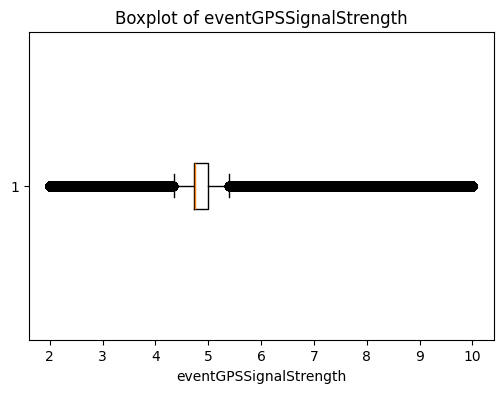

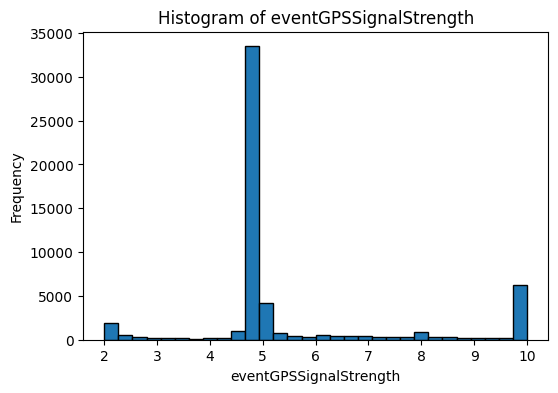

In [362]:
df = df[df['eventGPSSignalStrength'] <= 10]
print(df['eventGPSSignalStrength'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventGPSSignalStrength'], vert=False)
plt.title(f'Boxplot of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventGPSSignalStrength'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventGPSSignalStrength'}')
plt.xlabel('eventGPSSignalStrength')
plt.ylabel('Frequency')
plt.show()

In [363]:
df[df["eventEndSpeed"] >= 80]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap
42082,4.0,83.934400,1.447938,0.023603,2.0,2.042409,83.322900,84.545890,6.927329,7.566165,...,1.271527,1.271527,1.271527,1.668254,29.294144,3.876131,43.594315,2346.233200,1178.70180,1.222990
49311,4.0,92.908905,4.829000,0.103289,2.0,4.660463,93.422874,92.795654,1.025499,1.992407,...,2.782334,3.127677,3.261886,3.121254,7.070049,16.105791,34.423428,110.328210,618.46344,0.627220
49312,5.0,101.684990,3.632500,0.085054,1.0,4.722541,101.549355,101.888290,0.386638,0.623911,...,3.845366,3.932395,3.932395,3.917534,9.640648,19.179136,35.404484,50.867157,537.32070,0.338935
51129,4.0,79.728650,2.498500,0.044555,2.0,4.699545,79.473785,80.083910,0.052296,0.416082,...,2.446852,4.235865,4.235865,4.230453,11.805872,14.515944,29.972730,24.986550,515.83170,0.610125
53877,5.0,80.439610,2.156500,0.022784,1.0,10.000000,80.554695,80.324540,0.187371,1.303809,...,0.089018,0.089018,0.089018,0.139116,16.283860,0.300004,35.766440,14.877054,inf,0.230155


In [364]:
df[df["eventStartSpeed"] >= 80]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap
42082,4.0,83.934400,1.447938,0.023603,2.0,2.042409,83.322900,84.545890,6.927329,7.566165,...,1.271527,1.271527,1.271527,1.668254,29.294144,3.876131,43.594315,2346.233200,1178.70180,1.222990
49311,4.0,92.908905,4.829000,0.103289,2.0,4.660463,93.422874,92.795654,1.025499,1.992407,...,2.782334,3.127677,3.261886,3.121254,7.070049,16.105791,34.423428,110.328210,618.46344,0.627220
49312,5.0,101.684990,3.632500,0.085054,1.0,4.722541,101.549355,101.888290,0.386638,0.623911,...,3.845366,3.932395,3.932395,3.917534,9.640648,19.179136,35.404484,50.867157,537.32070,0.338935
53877,5.0,80.439610,2.156500,0.022784,1.0,10.000000,80.554695,80.324540,0.187371,1.303809,...,0.089018,0.089018,0.089018,0.139116,16.283860,0.300004,35.766440,14.877054,inf,0.230155


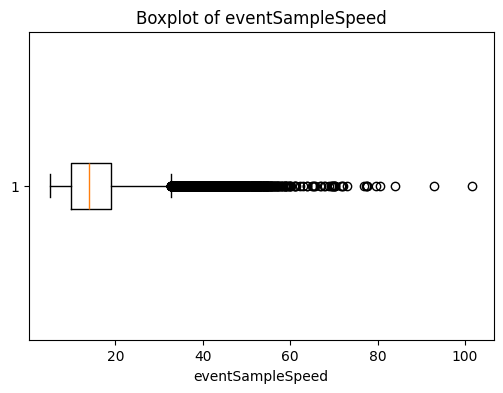

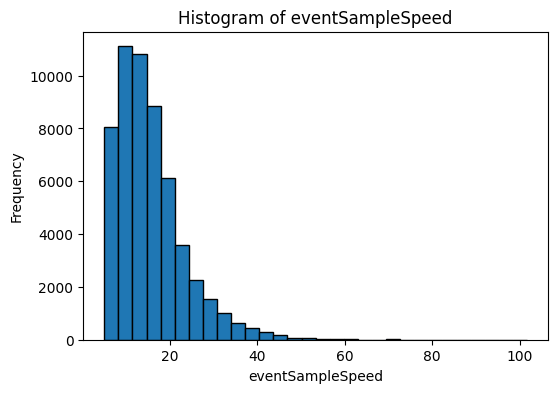

In [365]:
# Histograms for all numeric features
plt.figure(figsize=(6,4))
plt.boxplot(df['eventSampleSpeed'], vert=False)
plt.title(f'Boxplot of {'eventSampleSpeed'}')
plt.xlabel('eventSampleSpeed')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventSampleSpeed'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventSampleSpeed'}')
plt.xlabel('eventSampleSpeed')
plt.ylabel('Frequency')
plt.show()

In [366]:
df['eventSampleSpeed'].describe()

count    55222.000000
mean        15.551457
std          7.887404
min          5.001024
25%          9.923793
50%         13.918177
75%         19.068286
max        101.684990
Name: eventSampleSpeed, dtype: float64

count    55222.000000
mean         5.024688
std          3.083180
min          0.914496
25%          2.976532
50%          4.710141
75%          6.194610
max         24.980251
Name: eventDurationSeconds, dtype: float64


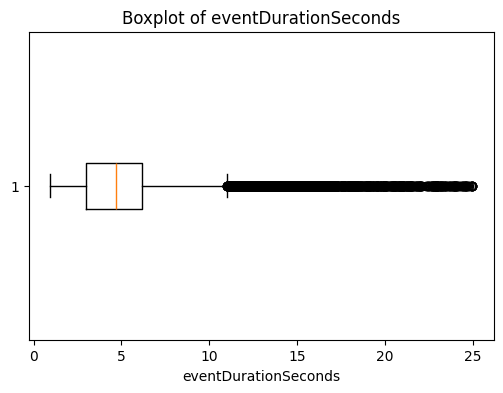

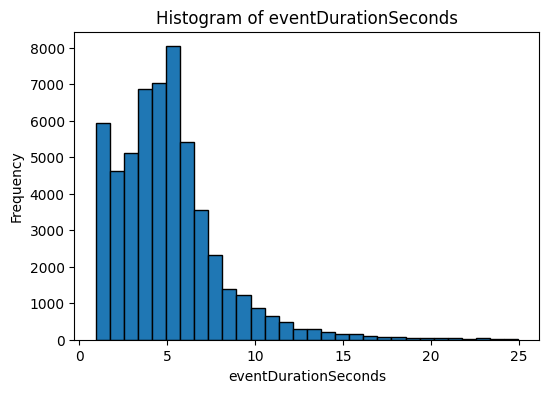

In [367]:
# Histograms for all numeric features
print(df['eventDurationSeconds'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventDurationSeconds'], vert=False)
plt.title(f'Boxplot of {'eventDurationSeconds'}')
plt.xlabel('eventDurationSeconds')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventDurationSeconds'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventDurationSeconds'}')
plt.xlabel('eventDurationSeconds')
plt.ylabel('Frequency')
plt.show()

count    54457.000000
mean         4.836419
std          2.641499
min          0.914496
25%          2.972313
50%          4.670500
75%          6.096281
max         14.999040
Name: eventDurationSeconds, dtype: float64


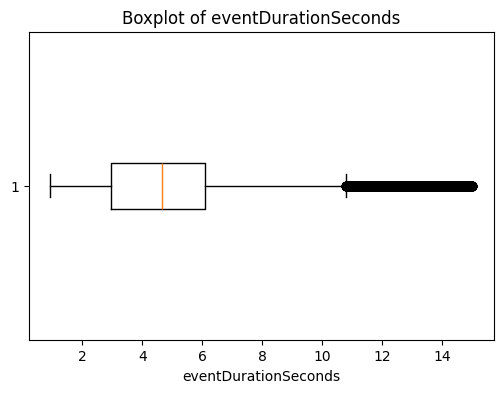

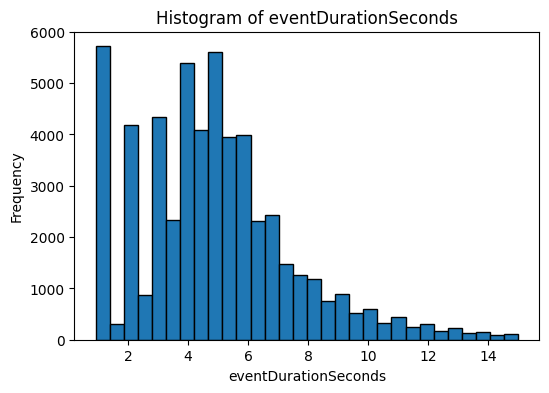

In [368]:
df = df[df['eventDurationSeconds'] <= 15]
print(df['eventDurationSeconds'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventDurationSeconds'], vert=False)
plt.title(f'Boxplot of {'eventDurationSeconds'}')
plt.xlabel('eventDurationSeconds')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventDurationSeconds'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventDurationSeconds'}')
plt.xlabel('eventDurationSeconds')
plt.ylabel('Frequency')
plt.show()

In [369]:
df.shape

(54457, 24)

In [370]:
df['eventMilesDriven'].describe()

count    54457.000000
mean         0.021305
std          0.017821
min          0.000000
25%          0.010281
50%          0.016909
75%          0.026836
max          1.007121
Name: eventMilesDriven, dtype: float64

count    54457.000000
mean         0.021305
std          0.017821
min          0.000000
25%          0.010281
50%          0.016909
75%          0.026836
max          1.007121
Name: eventMilesDriven, dtype: float64


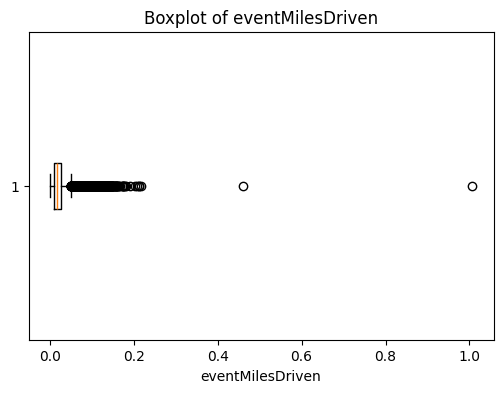

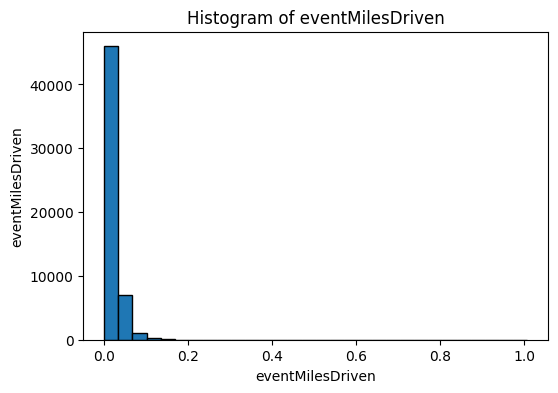

In [371]:
print(df['eventMilesDriven'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventMilesDriven'], vert=False)
plt.title(f'Boxplot of {'eventMilesDriven'}')
plt.xlabel('eventMilesDriven')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventMilesDriven'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventMilesDriven'}')
plt.xlabel('eventMilesDriven')
plt.ylabel('eventMilesDriven')
plt.show()

In [372]:
df[df['eventMilesDriven'] > 0.3]

,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap
26087,5.0,54.598022,1.685281,0.461197,0.0,3.535534,51.628574,54.16544,0.166697,0.489467,...,37.971184,53.305960,73.249650,39.432250,1.596961,126.57590,2.755407,97.52177,15.301535,2.536866
27410,5.0,21.836687,8.939344,1.007121,0.0,7.039361,0.000000,37.48973,1.307390,2.710624,...,1.166348,2.291208,9.133833,9.743315,0.038504,193.80922,0.345739,77.55178,75.064010,37.489730


count    54455.000000
mean         0.021279
std          0.017210
min          0.000000
25%          0.010281
50%          0.016909
75%          0.026835
max          0.217593
Name: eventMilesDriven, dtype: float64


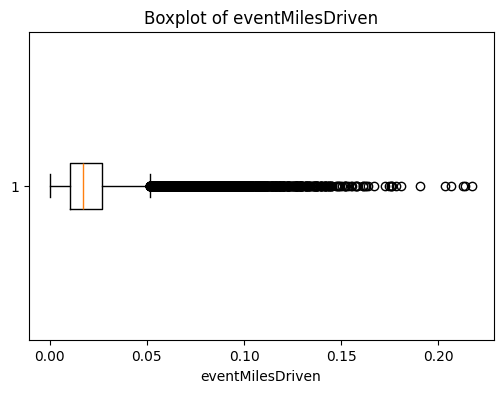

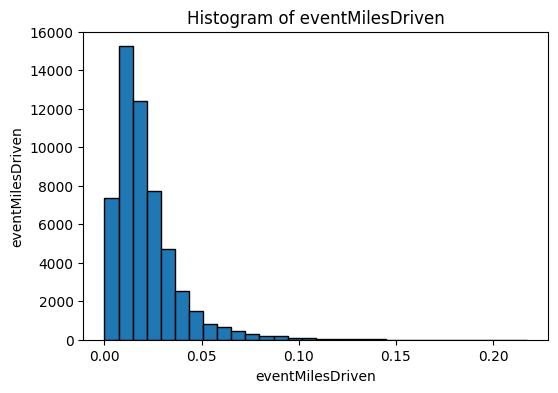

In [373]:
df = df[df['eventMilesDriven'] < 0.3]
print(df['eventMilesDriven'].describe())
plt.figure(figsize=(6,4))
plt.boxplot(df['eventMilesDriven'], vert=False)
plt.title(f'Boxplot of {'eventMilesDriven'}')
plt.xlabel('eventMilesDriven')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['eventMilesDriven'], bins=30, edgecolor='black')
plt.title(f'Histogram of {'eventMilesDriven'}')
plt.xlabel('eventMilesDriven')
plt.ylabel('eventMilesDriven')
plt.show()

In [375]:
df.shape

(54455, 24)

In [376]:
# IOS data cleaned !!!
# saving into cleaned csv file
df.to_csv(root / "data" / "processed" / "ios"/ "parent_clean.csv", index=False)

In [377]:
# checking csv file against this df
print(df.shape)
df_check = pd.read_csv(root / "data" / "processed" / "ios"/ "parent_clean.csv", header = 0)
print(df_check.shape)

(54455, 24)
(54455, 24)


In [ ]:
# YIPPEE!!!